## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

#### BONUS

5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

---

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Useful Resources

- Scraping is one of the most fun, useful and interesting skills out there. Don’t lose out by copying someone else's code!
- [Here is some advice on how to write for a non-technical audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---

### Project Feedback + Evaluation

For all projects, students will be evaluated on a simple 3 point scale (0, 1, or 2). Instructors will use this rubric when scoring student performance on each of the core project **requirements:** 

Score | Expectations
----- | ------------
**0** | _Does not meet expectations. Try again._
**1** | _Meets expectations. Good job._
**2** | _Surpasses expectations. Brilliant!_

[For more information on how we grade our DSI projects, see our project grading walkthrough.](https://git.generalassemb.ly/dsi-projects/readme/blob/master/README.md)


In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import unicodedata
import re
%matplotlib inline

__Import pickled file containing all jobs scraped from websites__

In [2]:
all_jobs = pd.read_pickle('all_jobs')

In [3]:
all_jobs.shape

(3235, 20)

In [4]:
all_jobs.head()

,company,country,job_title,description,required_skills,date_created,equity,job_category,job_type,last_updated,vacancies,salary_range,years_of_experience_required,currency,lower,higher,rate,lower_sgd,higher_sgd,index
0,Tech in Asia,Singapore,Data Scientist,"Tech in Asia (YC W15) is a media, events, and ...",Amazon Web Services (AWS) Data Visualization S...,28 Jan 2018,Yes,Data & Analytics,Full-time,28 Jan 2018,1.0,"SGD 4,500 - 6,000",1 – 4 years,SGD,4500,6000.0,1.000000,4500,6000.0,NaN
1,F Corporation,Indonesia,Data Scientist,Description\n\nThe focus of our data science t...,What is it like working at F Corporation?Worki...,26 Jan 2018,NaN,Data & Analytics,Full-time,26 Jan 2018,1.0,"IDR 5,000,000 - 9,000,000",1 – 4 years,IDR,5e+06,9000000.0,0.000098,490,882.0,NaN
2,Fabelio,Indonesia,Data Scientist,"Job Description:\nTransform large, complex dat...",Python Hadoop SQL,25 Jan 2018,NaN,Data & Analytics,Full-time,25 Jan 2018,1.0,"IDR 9,000,000 - 12,000,000",1 – 4 years,IDR,9e+06,12000000.0,0.000098,882,1176.0,NaN
3,Unisoft Infotech,Singapore,Data Scientist,Data Scientist\nThe position is for one of our...,Python Machine Learning R Artificial Intellige...,24 Jan 2018,NaN,Data & Analytics,Full-time,24 Jan 2018,2.0,"SGD 3,000 - 9,000",4 – 7 years,SGD,3000,9000.0,1.000000,3000,9000.0,NaN
4,Housal,Philippines,Data Scientist,Job Description\nWe are looking for a Data Sci...,Data Analysis Data Science Hadoop SQL Python T...,23 Jan 2018,Yes,Data & Analytics,Full-time,23 Jan 2018,1.0,"PHP 60,000 - 120,000",1 – 4 years,PHP,60000,120000.0,0.025000,1500,3000.0,NaN


__Basic cleaning - rename columns and drop duplicates__

In [5]:
# clean country column - Hong to Hong Kong
all_jobs['country'] = all_jobs['country'].map(lambda x: x.replace('Hong', 'Hong Kong') if x =='Hong' else x)

In [6]:
# drop duplicates
uniquetitle, duplicate_index = [],[]
for (i,x) in enumerate(all_jobs['job_title']):

    if len(x) > 40: # if job desc is too long and repeats, likely that it is a duplicate.
        if x in set(uniquetitle):
            duplicate_index.append(i)
        elif x not in set(uniquetitle):
            uniquetitle.append(x)
all_jobs.drop(index=duplicate_index, axis=0, inplace=True)

In [7]:
all_jobs.shape

(3088, 20)

__Clean description column__

In [8]:
# fill nas with empty cells to avoid errors from np.nan as a float
all_jobs['description'].fillna('', inplace=True)

In [9]:
# combine JD with required skills into 1 column
all_jobs['full_description'] = all_jobs['description'] + ' ' + all_jobs['required_skills']

In [10]:
# function to clean unicode from description
def clean_unicode(unicode_str):
    return unicodedata.normalize("NFKD", unicode_str)

all_jobs['full_description'] = all_jobs['full_description'].str.replace('\n',' ').apply(clean_unicode)

In [11]:
all_jobs['full_description'][0]

"Tech in Asia (YC W15) is a media, events, and jobs platform for Asia’s tech communities. At Tech in Asia, you can keep abreast of the latest news, share your thoughts, and find talent or jobs best suited to your needs. In this role, you will be building jobs recommendation models. The purpose of this data model is to recommend and help our Community Recruiting team scout for talent faster. You'll be required to be an end-to-end data scientist. The role includes understanding business needs, developing a proof-of-concept, data collection, and productionizing your data product. Requirements: Minimum 2 years of experience analytics and data science; experience in fields of computer science, engineering, science, mathematics, statistics, psychology, economics and linguistics are desirableDemonstrated ability and aptitude to learn new things and contribute ideasAbility to work independently to solve problems and develop solutionsExperience working with business users to understand the busi

__Clean years of experience column__

In [12]:
# function to extract years
def replace_years(x):
    if isinstance(x,str):
        y = x.lower()
    else:
        return x
    
    if y.find('min') > -1:
        return(int(re.findall(r'([0-9]+)',y)[0]))
    elif y.find('more') > -1:
        return(int(re.findall(r'([0-9]+)',y)[0]) + 1)
    elif y.find('less') > -1:
        return 0
    elif y.find('–') > -1:
        ya = re.findall(r'([0-9]+)',y)
        return (float(ya[1])-float(ya[0]))/2.
    elif y=='entry level':
        return 0
    elif y=='junior executive':
        return 1
    elif y=='manager':
        return 3
    else:
        return np.nan

In [13]:
all_jobs['years_of_experience_required'] = all_jobs['years_of_experience_required'].apply(replace_years)

# fill na with mean
all_jobs['yrs_exp'] = all_jobs['years_of_experience_required'].fillna(all_jobs['years_of_experience_required'].mean())

In [14]:
all_jobs.to_pickle('all_jobs_clean.pkl')

### Q1 Factors that predict salary (linear regression)

__1.1 - Clean up salary column__

In [15]:
# first analyse only those with salary information
all_jobs.dropna(subset=['salary_range'], inplace=True)

In [16]:
all_jobs.shape

(488, 22)

In [17]:
# fill all na in lower_sgd with corresponding value in higher_sgd, and vice versa
all_jobs['lower_sgd'] = all_jobs['lower_sgd'].fillna(all_jobs['salary_range']).astype(float)
all_jobs['higher_sgd'] = all_jobs['higher_sgd'].fillna(all_jobs['salary_range']).astype(float)

# create new average salary column
all_jobs['mean_salary_sgd'] = (all_jobs['lower_sgd'] + all_jobs['higher_sgd'])/2

__1.2 - Handle outliers in salary__

In [18]:
# check for outliers across all countries - per month salary logically should not be less than $50 SGD
# The average wage per person in Vietnam is around 3.2 million VND ($150) a month
outliers = all_jobs[all_jobs['mean_salary_sgd'] < 50]

# first outlier is real - edit salary to match
condition = all_jobs['job_title'] == outliers['job_title'].iloc[0]
all_jobs['mean_salary_sgd'] = np.where(condition, 2800, all_jobs['mean_salary_sgd'])

# remove remaining monthly salaries less than 50sgd as irrelevant jobs
all_jobs = all_jobs[all_jobs['mean_salary_sgd'] > 50]

In [19]:
# check for outliers in singapore (more knowledge to clean separately)
# per month salary logically should not be less than $1000 SGD (excluding internships)
outliers = all_jobs[(all_jobs['mean_salary_sgd'] < 1000) & (all_jobs['country'] == 'Singapore') & (all_jobs['job_type'] != 'Internship')]

# second outlier is real - edit salary to match
condition = all_jobs['job_title'] == outliers['job_title'].iloc[1]
all_jobs['mean_salary_sgd'] = np.where(condition, 3500, all_jobs['mean_salary_sgd'])

# fourth outlier is real - edit salary to match
condition = all_jobs['job_title'] == outliers['job_title'].iloc[3]
all_jobs['mean_salary_sgd'] = np.where(condition, 3400, all_jobs['mean_salary_sgd'])

# fourth outlier is real - edit salary to match
condition = all_jobs['job_title'] == outliers['job_title'].iloc[4]
all_jobs['mean_salary_sgd'] = np.where(condition, 3000, all_jobs['mean_salary_sgd'])

# remove remaining monthly salaries less than 1000SGD as irrelevant jobs
all_jobs = all_jobs[all_jobs['mean_salary_sgd'] > 1000]

In [20]:
# check for outliers - per month salary logically should not exceed $20,000 SGD
all_jobs[all_jobs['mean_salary_sgd'] > 20000]

,company,country,job_title,description,required_skills,date_created,equity,job_category,job_type,last_updated,...,currency,lower,higher,rate,lower_sgd,higher_sgd,index,full_description,yrs_exp,mean_salary_sgd
135,SmartBuild Asia,Malaysia,Senior Python Developer,Job Requirements:\nDeep knowledge in a program...,Python Data Analysis Data Science,18 Jan 2018,NaN,Data & Analytics,Full-time,18 Jan 2018,...,MYR,70000,70000.0,0.34,23800.0,23800.0,NaN,Job Requirements: Deep knowledge in a programm...,1.5,23800.0
1219,CVista HR Consulting Pte Ltd,Singapore,Regional Pricing Analyst (Logistics / Japanese...,,"Our client, a well-known Japanese 3PL MNC is c...",NaN,NaN,Human Resources Management/Consulting,NaN,NaN,...,NaN,NaN,NaN,NaN,35005.0,35005.0,NaN,"Our client, a well-known Japanese 3PL MNC is ...",2.0,35005.0
1842,Hitachi Asia Ltd,Singapore,Senior Executive,,The Job:Responsible for ICT solution sales to ...,NaN,NaN,Electrical & Electronics,NaN,NaN,...,NaN,NaN,NaN,NaN,1000000.0,1000000.0,NaN,The Job:Responsible for ICT solution sales to...,5.0,1000000.0
2093,Achieve Career Consultant Pte Ltd,Singapore,Process Engineer (UP to $3.5K / West / 5 days),,Established international manufacturing compan...,NaN,NaN,Human Resources Management/Consulting,NaN,NaN,...,NaN,NaN,NaN,NaN,35005.0,35005.0,NaN,Established international manufacturing compa...,2.0,35005.0
3004,Kelly Services (S) Pte Ltd,Singapore,Mechanical CAD Designer / Salary $4300 / Toa P...,,My client is a Dutch technology company headqu...,NaN,NaN,Human Resources Management/Consulting,NaN,NaN,...,NaN,NaN,NaN,NaN,43001.0,43001.0,NaN,My client is a Dutch technology company headq...,1.0,43001.0


In [21]:
# typo - should be 3500 instead of 35005, and 4300 instead of 43001
condition = all_jobs['mean_salary_sgd'] == 35005
all_jobs['mean_salary_sgd'] = np.where(condition, 3500, all_jobs['mean_salary_sgd'])

condition = all_jobs['mean_salary_sgd'] == 43001
all_jobs['mean_salary_sgd'] = np.where(condition, 4300, all_jobs['mean_salary_sgd'])

# incorrect units - likely yearly salary instead of monthly salary (MYR 70,000 and SGD 1,000,000)
# divide outlier salary by 12 to convert to monthly salary
condition = all_jobs['mean_salary_sgd'] > 20000
all_jobs['mean_salary_sgd'] = np.where(condition, all_jobs['mean_salary_sgd']/12, all_jobs['mean_salary_sgd'])

# remove monthly salaries greater than 20,000sgd as outliers
all_jobs = all_jobs[all_jobs['mean_salary_sgd'] < 20000]

In [22]:
all_jobs['mean_salary_sgd'].describe()

count      375.000000
mean      4004.314622
std       2092.171888
min       1020.000000
25%       2450.000000
50%       3750.000000
75%       5000.000000
max      11000.000000
Name: mean_salary_sgd, dtype: float64

__1.3 Visualise salary__

/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


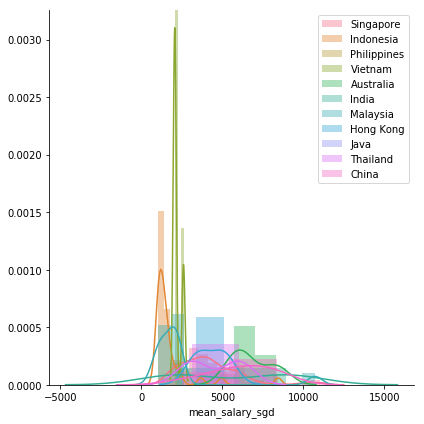

In [23]:
# different countries have different salary distributions 
g = sns.FacetGrid(all_jobs[['country','mean_salary_sgd']], hue='country', size=6)
g = g.map(sns.distplot, 'mean_salary_sgd')
plt.legend()

/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


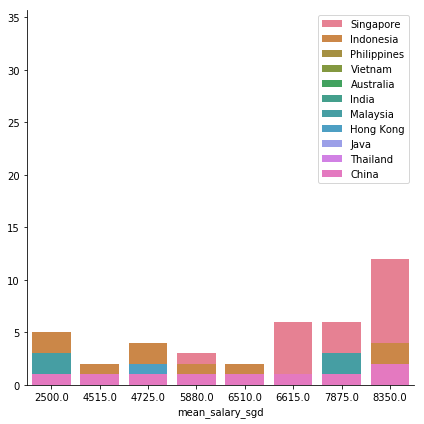

In [24]:
# different countries have different salary distributions 
g = sns.FacetGrid(all_jobs[['country','mean_salary_sgd']], hue='country', size=6)
g = g.map(sns.countplot, 'mean_salary_sgd')
plt.legend()

__1.4 Visualise years of experience against salary__

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


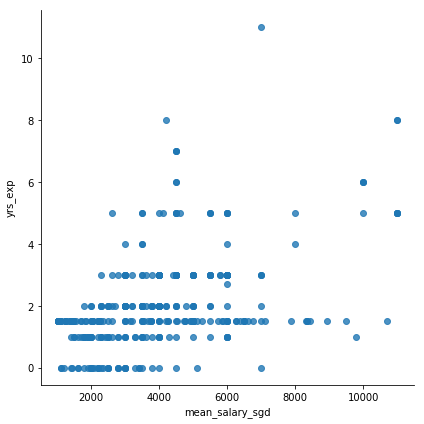

In [25]:
# different countries have different salary distributions 
g = sns.FacetGrid(all_jobs[['yrs_exp','mean_salary_sgd']], size=6)
g = g.map(sns.regplot, 'mean_salary_sgd', 'yrs_exp', fit_reg=False)
plt.legend()

In [26]:
all_jobs.head()

,company,country,job_title,description,required_skills,date_created,equity,job_category,job_type,last_updated,...,currency,lower,higher,rate,lower_sgd,higher_sgd,index,full_description,yrs_exp,mean_salary_sgd
0,Tech in Asia,Singapore,Data Scientist,"Tech in Asia (YC W15) is a media, events, and ...",Amazon Web Services (AWS) Data Visualization S...,28 Jan 2018,Yes,Data & Analytics,Full-time,28 Jan 2018,...,SGD,4500,6000.0,1.000000,4500.00,6000.0,NaN,"Tech in Asia (YC W15) is a media, events, and ...",1.5,5250.000
2,Fabelio,Indonesia,Data Scientist,"Job Description:\nTransform large, complex dat...",Python Hadoop SQL,25 Jan 2018,NaN,Data & Analytics,Full-time,25 Jan 2018,...,IDR,9e+06,12000000.0,0.000098,882.00,1176.0,NaN,"Job Description: Transform large, complex data...",1.5,1029.000
3,Unisoft Infotech,Singapore,Data Scientist,Data Scientist\nThe position is for one of our...,Python Machine Learning R Artificial Intellige...,24 Jan 2018,NaN,Data & Analytics,Full-time,24 Jan 2018,...,SGD,3000,9000.0,1.000000,3000.00,9000.0,NaN,Data Scientist The position is for one of our ...,1.5,6000.000
4,Housal,Philippines,Data Scientist,Job Description\nWe are looking for a Data Sci...,Data Analysis Data Science Hadoop SQL Python T...,23 Jan 2018,Yes,Data & Analytics,Full-time,23 Jan 2018,...,PHP,60000,120000.0,0.025000,1500.00,3000.0,NaN,Job Description We are looking for a Data Scie...,1.5,2250.000
5,Knorex,Vietnam,Data Scientist,"Knorex develops a cloud-based, highly scalable...",Data Science Data Management Data Analysis,19 Jan 2018,Yes,Data & Analytics,Full-time,19 Jan 2018,...,VND,2.5e+07,46000000.0,0.000058,1443.75,2656.5,NaN,"Knorex develops a cloud-based, highly scalable...",1.5,2050.125


In [27]:
# drop irrelevant job
all_jobs.drop(index=all_jobs.index[-4], axis=0, inplace=True)

In [28]:
all_jobs.shape

(374, 23)

In [29]:
all_jobs.to_pickle('salary_clean.pkl')

__1.7 Get dummies for country column__

In [30]:
country_dum = pd.get_dummies(all_jobs['country'], drop_first=True)

__1.8 Use tf-idf to generate features on 'description', together with years of exp and countries__

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.feature_extraction import text 

In [32]:
# create X
X = pd.concat([all_jobs[['full_description','yrs_exp']], country_dum], axis=1)
y = all_jobs['mean_salary_sgd']
X.tail()

,full_description,yrs_exp,China,Hong Kong,India,Indonesia,Java,Malaysia,Philippines,Singapore,Thailand,Vietnam
3106,Branded FMCG MNC Min 2 years pricing or co...,5.0,0,0,0,0,0,0,0,1,0,0
3113,[Order Number: 1712-49457]Responsibilities:To...,2.0,0,0,0,0,0,0,0,1,0,0
3148,Responsibilities:Assembly and testing of the ...,0.0,0,0,0,0,0,0,0,1,0,0
3156,Admin Assistant 3 - 6 months $1800 -$2200 Sh...,1.0,0,0,0,0,0,0,0,1,0,0
3216,[MUST] Min. NITEC in Electrical and Electroni...,1.0,0,0,0,0,0,0,0,1,0,0


In [33]:
# create list of stop words
my_additional_stop_words = []
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

#find ngrams (unique terms)
tfidf = TfidfVectorizer(ngram_range=(2,3), stop_words=stop_words, sublinear_tf=True, max_df=0.5, max_features=2500)

In [34]:
# check most frequent bigrams/trigrams in the full description
summaries = ''.join(X['full_description'])
ngrams_summaries = tfidf.build_analyzer()(summaries)

Counter(ngrams_summaries).most_common(20)

[('email protected', 215),
 ('word format', 146),
 ('personal information', 128),
 ('submitting application', 127),
 ('deemed agreed', 127),
 ('agreed consented', 127),
 ('disclosing personal', 127),
 ('information prospective', 127),
 ('prospective employers', 127),
 ('employers consideration', 127),
 ('deemed agreed consented', 127),
 ('disclosing personal information', 127),
 ('personal information prospective', 127),
 ('information prospective employers', 127),
 ('prospective employers consideration', 127),
 ('ms word', 126),
 ('application sume', 126),
 ('sume deemed', 126),
 ('submitting application sume', 126),
 ('application sume deemed', 126)]

In [35]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_dense = pd.DataFrame(tfidf.fit_transform(X_train['full_description']).todense())
X_test_dense = pd.DataFrame(tfidf.transform(X_test['full_description']).todense())

/usr/local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [36]:
# concat tf-idf features with rest of df - reset index and concat for train and test sets
X_train.reset_index(drop=True, inplace=True)
X_train_dense.reset_index(drop=True, inplace=True)
X_train_dense = pd.concat([X_train_dense, X_train.drop('full_description', axis=1)], axis=1)

X_test.reset_index(drop=True, inplace=True)
X_test_dense.reset_index(drop=True, inplace=True)
X_test_dense = pd.concat([X_test_dense, X_test.drop('full_description', axis=1)], axis=1)

__1.9 Model with Lasso/Ridge penalty__

In [37]:
# try Lasso model
lasso = LassoCV()
lasso.fit(X_train_dense, y_train)
lasso.score(X_test_dense, y_test)

0.5599289396329757

In [38]:
# try Ridge model
ridge = RidgeCV()
ridge.fit(X_train_dense, y_train)
ridge.score(X_test_dense, y_test)

0.5854588917938661

In [39]:
# get top 20 tf-idf terms
features = tfidf.get_feature_names()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(tfidf.fit_transform(X_train['full_description']).toarray()).flatten()[::-1]
n = 20
top_n = feature_array[tfidf_sorting][:n]

/usr/local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [40]:
top_n

array(['marketing automation', 'digital marketing', 'analytics tools',
       'product team', 'marketing campaigns', 'marketing team',
       'good communication skills', 'best practices', 'social media',
       'strong analytical', 'data analysis', 'data driven',
       'requirements bachelor degree', 'good communication',
       'analytical skills', 'data mining', 'requirements bachelor',
       'communication skills', 'bachelor degree',
       'email subject providing'], dtype='<U43')

In [41]:
# try classification

### Q2 Factors that distinguish job category

- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

In [42]:
q2_all_jobs = pd.read_pickle('all_jobs_clean.pkl')

In [43]:
q2_all_jobs.head()

,company,country,job_title,description,required_skills,date_created,equity,job_category,job_type,last_updated,...,years_of_experience_required,currency,lower,higher,rate,lower_sgd,higher_sgd,index,full_description,yrs_exp
0,Tech in Asia,Singapore,Data Scientist,"Tech in Asia (YC W15) is a media, events, and ...",Amazon Web Services (AWS) Data Visualization S...,28 Jan 2018,Yes,Data & Analytics,Full-time,28 Jan 2018,...,1.5,SGD,4500,6000.0,1.000000,4500,6000.0,NaN,"Tech in Asia (YC W15) is a media, events, and ...",1.5
1,F Corporation,Indonesia,Data Scientist,Description\n\nThe focus of our data science t...,What is it like working at F Corporation?Worki...,26 Jan 2018,NaN,Data & Analytics,Full-time,26 Jan 2018,...,1.5,IDR,5e+06,9000000.0,0.000098,490,882.0,NaN,Description The focus of our data science tea...,1.5
2,Fabelio,Indonesia,Data Scientist,"Job Description:\nTransform large, complex dat...",Python Hadoop SQL,25 Jan 2018,NaN,Data & Analytics,Full-time,25 Jan 2018,...,1.5,IDR,9e+06,12000000.0,0.000098,882,1176.0,NaN,"Job Description: Transform large, complex data...",1.5
3,Unisoft Infotech,Singapore,Data Scientist,Data Scientist\nThe position is for one of our...,Python Machine Learning R Artificial Intellige...,24 Jan 2018,NaN,Data & Analytics,Full-time,24 Jan 2018,...,1.5,SGD,3000,9000.0,1.000000,3000,9000.0,NaN,Data Scientist The position is for one of our ...,1.5
4,Housal,Philippines,Data Scientist,Job Description\nWe are looking for a Data Sci...,Data Analysis Data Science Hadoop SQL Python T...,23 Jan 2018,Yes,Data & Analytics,Full-time,23 Jan 2018,...,1.5,PHP,60000,120000.0,0.025000,1500,3000.0,NaN,Job Description We are looking for a Data Scie...,1.5


__2.1 Clean job title column as target__

In [44]:
# create column classifying data_scientist and non-data scientists
q2_all_jobs['data_scientist'] = q2_all_jobs['job_title'].map(lambda x: 1 if 'data scientist' in x.lower() 
                                                             else 1 if 'data science' in x.lower() else 0)

In [45]:
# baseline
baseline = q2_all_jobs['data_scientist'].sum()/len(q2_all_jobs['job_title'])
if baseline < 0.5:
    baseline = 1 - baseline
baseline

0.9336139896373057

__2.2 Feature selection__

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
# predicting with only description, yrs exp and country
country_dum = pd.get_dummies(q2_all_jobs['country'], drop_first=True)
X = pd.concat([q2_all_jobs[['full_description','yrs_exp']], country_dum], axis=1)
y = q2_all_jobs['data_scientist']

In [48]:
# create list of stop words
my_additional_stop_words = ['data','science', 'scientist']
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

#find ngrams (unique terms)
tfidf = TfidfVectorizer(ngram_range=(2,3), stop_words=stop_words, sublinear_tf=True, max_df=0.5, max_features=2500)

In [49]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_dense = pd.DataFrame(tfidf.fit_transform(X_train['full_description']).todense())
X_test_dense = pd.DataFrame(tfidf.transform(X_test['full_description']).todense())

/usr/local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [50]:
# scale
ss = StandardScaler()
X_train_s = pd.DataFrame(ss.fit_transform(X_train.drop('full_description', axis=1)))
X_test_s = pd.DataFrame(ss.transform(X_test.drop('full_description', axis=1)))

In [51]:
# concat tf-idf features with rest of df - reset index and concat for train and test sets
X_train.reset_index(drop=True, inplace=True)
X_train_dense.reset_index(drop=True, inplace=True)
X_train_dense = pd.concat([X_train_dense, X_train_s], axis=1)

X_test.reset_index(drop=True, inplace=True)
X_test_dense.reset_index(drop=True, inplace=True)
X_test_dense = pd.concat([X_test_dense, X_test_s], axis=1)

In [52]:
X_train_dense.head()

,0,1,2,3,4,5,6,7,8,9,...,3,4,5,6,7,8,9,10,11,12
0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,-0.053311,-0.045038,-0.214865,-0.028467,-0.088045,-0.045038,0.667934,-0.034872,-0.028467,-0.049346
1,0.0,0.101126,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,-0.053311,-0.045038,-0.214865,-0.028467,-0.088045,-0.045038,0.667934,-0.034872,-0.028467,-0.049346
2,0.0,0.000000,0.0,0.0,0.198855,0.209240,0.0,0.0,0.0,0.0,...,-0.053311,-0.045038,-0.214865,-0.028467,-0.088045,-0.045038,-1.497154,-0.034872,-0.028467,-0.049346
3,0.0,0.000000,0.0,0.0,0.084072,0.088462,0.0,0.0,0.0,0.0,...,-0.053311,-0.045038,-0.214865,-0.028467,-0.088045,-0.045038,-1.497154,-0.034872,-0.028467,-0.049346
4,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,-0.053311,-0.045038,-0.214865,-0.028467,-0.088045,-0.045038,0.667934,-0.034872,-0.028467,-0.049346


__2.3 Model with Logistic Regression, RidgeClassifier__

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, ElasticNetCV

In [54]:
# try logistic regression model
lr = LogisticRegressionCV()
lr.fit(X_train_dense, y_train)
y_pred = lr.predict(X_test_dense)
print(lr.score(X_test_dense, y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9546925566343042
[[567   7]
 [ 21  23]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       574
          1       0.77      0.52      0.62        44

avg / total       0.95      0.95      0.95       618



In [55]:
# try RidgeClassifierCV
ridge = RidgeClassifierCV()
ridge.fit(X_train_dense, y_train)
y_pred = ridge.predict(X_test_dense)
print(ridge.score(X_test_dense, y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9530744336569579
[[570   4]
 [ 25  19]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       574
          1       0.83      0.43      0.57        44

avg / total       0.95      0.95      0.95       618



In [56]:
# get top 20 tf-idf terms
features = tfidf.get_feature_names()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(tfidf.fit_transform(X_train['full_description']).toarray()).flatten()[::-1]
n = 20
top_n = feature_array[tfidf_sorting][:n]

/usr/local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [57]:
top_n

array(['office hours', 'days work week', 'work week', 'working location',
       'days work', '6778 5288', 'singapore 079120 tel', 'fax 6578',
       'fax 6578 7400', '5288 fax', '5288 fax 6578', '6578 7400',
       '78 shenton', '6778 5288 fax', 'tel 6778 5288', '78 shenton way',
       'shenton way 09', 'way 09', 'way 09 01', 'tel 6778'], dtype='<U41')